In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('cars.csv')

df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


In [45]:
#Initial data set up
df = pd.read_csv('cars.csv')

#Creating new binry variable to determine cars that sold quickly or slowly
#df['list_length'] = np.where(df['duration_listed'] > df['duration_listed'].mean(), '1', '0')

#Dropping columns we cannot use
df.drop(['location_region','feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','feature_7','feature_8','feature_9','feature_0','manufacturer_name', 'model_name'], axis = 1, inplace = True)
df.head()


,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,number_of_photos,up_counter,duration_listed
0,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,9,13,16
1,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,True,12,54,83
2,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,True,4,72,151
3,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,9,42,86
4,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,True,14,7,7


# Data Visualization

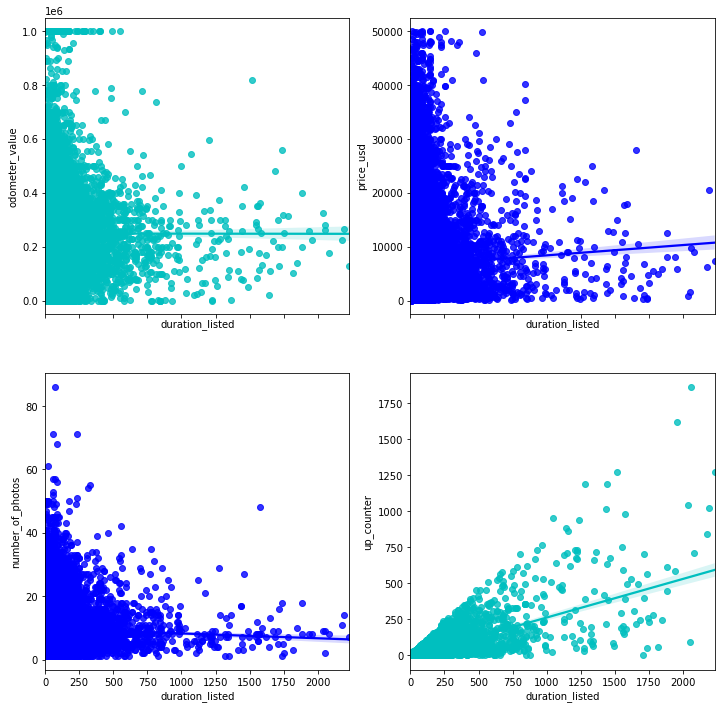

In [5]:

f, axes = plt.subplots(2, 2, figsize=(12, 12), sharex=True)
sns.regplot(x="duration_listed", y="odometer_value", data=df, color="c", ax=axes[0, 0])
sns.regplot(x="duration_listed", y="price_usd", data=df, color="b", ax=axes[0, 1])
sns.regplot(x="duration_listed", y="number_of_photos", data=df, color="b", ax=axes[1, 0])
sns.regplot(x="duration_listed", y="up_counter", data=df, color="c", ax=axes[1, 1])

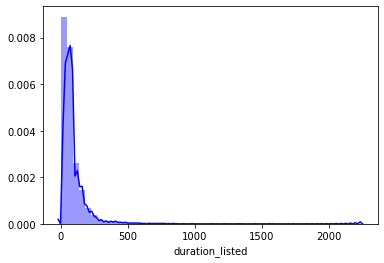

In [6]:
sns.distplot( df["duration_listed"] , color="b")

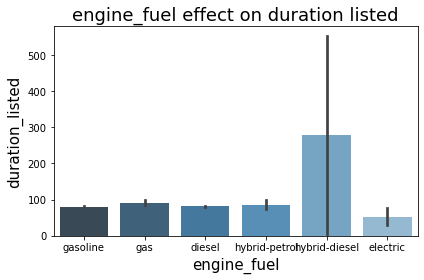

In [8]:
#Data exploration
#p1=sns.kdeplot(df['odometer_value'], shade=True, color="r")
#plt.figure(figsize=(12,8))
ax = sns.barplot(x="engine_fuel", y="duration_listed", data=df,palette="Blues_d")
# set labels

plt.xlabel("engine_fuel", size=15)
plt.ylabel("duration_listed", size=15)
plt.title("engine_fuel effect on duration listed", size=18)
plt.tight_layout()

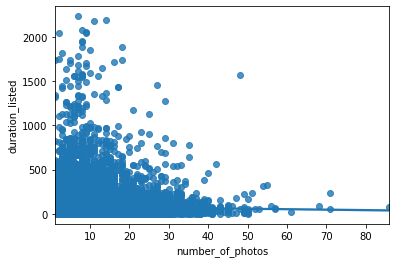

In [10]:
sns.regplot(x=df["number_of_photos"], y=df["duration_listed"])

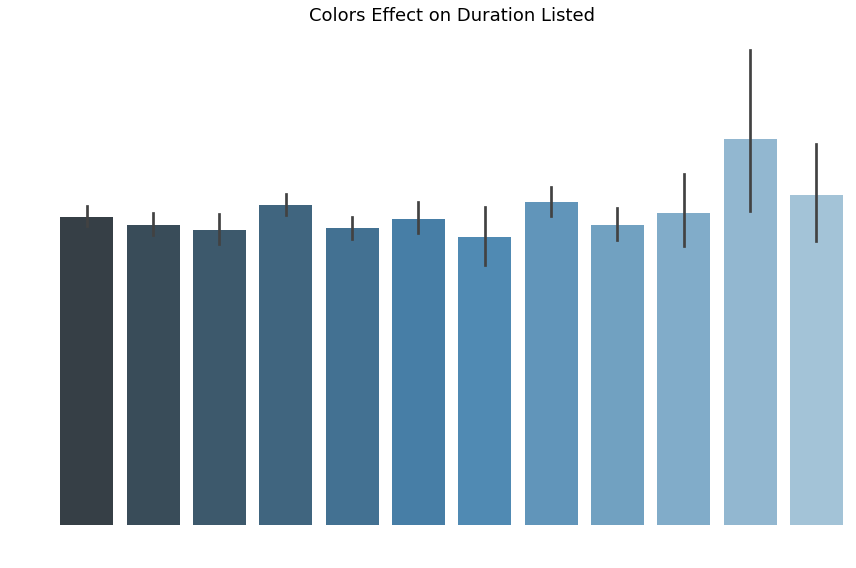

In [13]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x="color", y="duration_listed", data=df,palette="Blues_d")
ax.spines['bottom'].set_color('white') 
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')
plt.xlabel("color", size=15)
plt.ylabel("duration_listed", size=15)
plt.title("Colors Effect on Duration Listed", size=18)
plt.tight_layout()

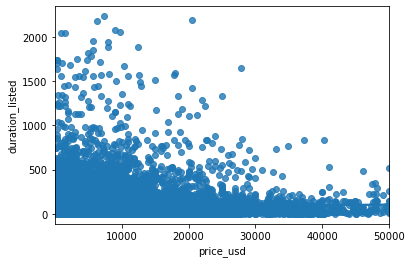

In [14]:
sns.regplot(x=df["price_usd"], y=df["duration_listed"])

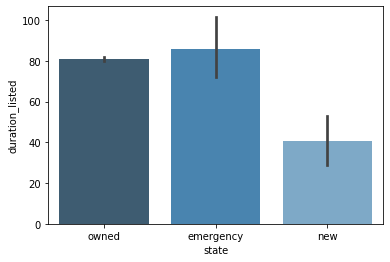

In [16]:
ax = sns.barplot(x="state", y="duration_listed", data=df,palette="Blues_d")

In [47]:
#Creating new binry variable to determine cars that sold quickly or slowly
df['list_length'] = np.where(df['duration_listed'] > df['duration_listed'].mean(), '1', '0')


In [48]:
#Data cleaning

#Need to change strings into numbers

df['transmission'] = df['transmission'].replace(['automatic'],0)
df['transmission'] = df['transmission'].replace(['mechanical'],1)

replace_map = {'color': {'silver':0,
'blue':1,
'red':2,
'black':3,
'grey':4,
'other':5,
'brown':6,
'white':7,
'green':8,
'violet':9,
'orange':10,
'yellow':11
}}

labels = df['color'].astype('category').cat.categories.tolist()
replace_map_comp = {'color' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
df_replace = df.copy()
df_replace.replace(replace_map_comp, inplace=True)
df = df_replace
df.head()

df['engine_fuel'] = df['engine_fuel'].replace(['gasoline'],0)
df['engine_fuel'] = df['engine_fuel'].replace(['gas'],1)
df['engine_fuel'] = df['engine_fuel'].replace(['diesel'],2)
df['engine_fuel'] = df['engine_fuel'].replace(['hybrid-petrol'],3)
df['engine_fuel'] = df['engine_fuel'].replace(['hybrid-diesel'],4)
df['engine_fuel'] = df['engine_fuel'].replace(['electric'],5)

df['engine_type'] = df['engine_type'].replace(['gasoline'],0)
df['engine_type'] = df['engine_type'].replace(['electric'],1)
df['engine_type'] = df['engine_type'].replace(['diesel'],2)

replace_map = {'body_type': {'universal':0,
'suv':1,
'sedan':2,
'hatchback':3,
'liftback':4,
'minivan':5,
'minibus':6,
'van':7,
'pickup':8,
'coupe':9,
'cabriolet':10,
'limousine':11
}}

labels = df['body_type'].astype('category').cat.categories.tolist()
replace_map_comp = {'body_type' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
df_replace = df.copy()
df_replace.replace(replace_map_comp, inplace=True)
df = df_replace


df['state'] = df['state'].replace(['owned'],0)
df['state'] = df['state'].replace(['emergency'],1)
df['state'] = df['state'].replace(['new'],2)

df['drivetrain'] = df['drivetrain'].replace(['all'],0)
df['drivetrain'] = df['drivetrain'].replace(['front'],1)
df['drivetrain'] = df['drivetrain'].replace(['rear'],2)


#Find and remove null values
df.isnull().any()
df = df.dropna()


#Changing all values to integer data types
df.head()
df['engine_capacity'] = df['engine_capacity'].astype(int) 
df['price_usd'] = df['price_usd'].astype(int) 
df['is_exchangeable'] = df['is_exchangeable'].astype(int) 
df['has_warranty'] = df['has_warranty'].astype(int) 
df['engine_has_gas'] = df['engine_has_gas'].astype(int)
df['list_length'] = df['list_length'].astype(int)

#Can only be run once for duration list removal
df.drop(['duration_listed'], axis = 1, inplace = True)
df.head()

,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,number_of_photos,up_counter,list_length
0,0,9,190000,2010,0,0,0,2,11,0,0,0,10900,0,9,13,0
1,0,2,290000,2002,0,0,0,3,11,0,0,0,5000,1,12,54,1
2,0,8,402000,2001,0,0,0,2,10,0,0,0,2800,1,4,72,1
3,1,2,10000,1999,0,0,0,3,9,0,0,0,9999,1,9,42,1
4,0,1,280000,2001,0,0,0,2,11,0,0,0,2134,1,14,7,0


# Machine Learning Models

In [49]:
print(df.shape)
array=df.values
X=array[:,0:16]
Y=array[:,16]

validation_size=0.3 #30% of data is reserved

seed=7 #ensures we randomly generate a fixed value

X_train,X_validation,Y_train,Y_validation=model_selection.train_test_split(X,Y,test_size=validation_size,random_state=seed)
scoring='accuracy'

(38521, 17)


In [50]:
#LogisticRegression
logistic=LogisticRegression(C=1e5)
logistic.fit(X_train,Y_train).score(X_validation,Y_validation)
y_pred=logistic.predict(X_validation)

kfold=model_selection.KFold(n_splits=10,random_state=seed)
cv_results=model_selection.cross_val_score(LogisticRegression(),X_train,Y_train,cv=kfold,scoring=scoring)

print('LogReg CV (mean, std)', cv_results.mean(),cv_results.std())
print(confusion_matrix(Y_validation,y_pred))

list(zip(df,logistic.coef_))
#accuracy_score(Y_validation,y_pred)


LogReg CV (mean, std) 0.735573609648703 0.007979814206559842
[[7114  520]
 [2691 1232]]


[('transmission',
  array([-5.42698905e-05,  6.19057080e-05,  3.95839465e-07, -7.55567927e-04,
         -5.50489597e-05,  8.34051621e-06, -6.54215174e-05,  1.76066393e-04,
         -7.22999844e-05, -3.38562646e-05, -5.78946428e-05, -1.58041577e-06,
          1.39665088e-06,  4.85780714e-06, -1.10862971e-03,  5.25032471e-02]))]

In [51]:
#DecisionTreeClassifier
DTC=DecisionTreeClassifier()
DTC.fit(X_train,Y_train).score(X_validation,Y_validation)
y_pred=DTC.predict(X_validation)

kfold=model_selection.KFold(n_splits=10,random_state=seed)
cv_results=model_selection.cross_val_score(DecisionTreeClassifier(),X_train,Y_train,cv=kfold,scoring=scoring)

print('DTC CV (mean, std)', cv_results.mean(),cv_results.std())
print(confusion_matrix(Y_validation,y_pred))
#accuracy_score(Y_validation,y_pred)
print(DTC.feature_importances_)


DTC CV (mean, std) 0.6684840503075733 0.006913693680138086
[[5672 1962]
 [1920 2003]]
[0.01555994 0.06178332 0.15807604 0.09465935 0.01301811 0.00656733
 0.00787963 0.02590536 0.05270628 0.0005859  0.00104282 0.0182206
 0.15047112 0.01226361 0.08016122 0.30109936]


In [52]:
#KNeighborsClassifier
KNN=KNeighborsClassifier()
KNN.fit(X_train,Y_train).score(X_validation,Y_validation)
y_pred=KNN.predict(X_validation)

kfold=model_selection.KFold(n_splits=10,random_state=seed)
cv_results=model_selection.cross_val_score(KNeighborsClassifier(),X_train,Y_train,cv=kfold,scoring=scoring)

print('KNN CV (mean, std)', cv_results.mean(),cv_results.std())
print(confusion_matrix(Y_validation,y_pred))


KNN CV (mean, std) 0.6138542632818751 0.008926521395845533
[[6175 1459]
 [3018  905]]


In [53]:
#Random Forest
rf=RandomForestClassifier()
rf.fit(X_train,Y_train).score(X_validation,Y_validation)
y_pred=rf.predict(X_validation)

kfold=model_selection.KFold(n_splits=10,random_state=seed)
cv_results=model_selection.cross_val_score(RandomForestClassifier(),X_train,Y_train,cv=kfold,scoring=scoring)

print('RF CV (mean, std)', cv_results.mean(),cv_results.std())
print(confusion_matrix(Y_validation,y_pred))


list(zip(df,rf.feature_importances_))

RF CV (mean, std) 0.7353138969665162 0.006644597036091661
[[6860  774]
 [2411 1512]]


[('transmission', 0.01333132993733108),
 ('color', 0.06438197529978547),
 ('odometer_value', 0.14031848653385817),
 ('year_produced', 0.09406111551160581),
 ('engine_fuel', 0.014015016803307705),
 ('engine_has_gas', 0.004825739303371033),
 ('engine_type', 0.009864200984128072),
 ('engine_capacity', 0.023352738839806247),
 ('body_type', 0.04818393170440414),
 ('has_warranty', 0.0014558755368364556),
 ('state', 0.002450759945032984),
 ('drivetrain', 0.017437767127080596),
 ('price_usd', 0.13550121373442903),
 ('is_exchangeable', 0.013954150765823214),
 ('number_of_photos', 0.09447115037560398),
 ('up_counter', 0.3223945475975961)]

In [54]:
#Re setting up data to get back original dependant variable
df = pd.read_csv('cars.csv')

#Dropping columns we cannot use
df.drop(['location_region','feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','feature_7','feature_8','feature_9','feature_0','manufacturer_name', 'model_name'], axis = 1, inplace = True)
df.head()
#df['duration_listed'].median()

,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,number_of_photos,up_counter,duration_listed
0,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,9,13,16
1,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,True,12,54,83
2,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,True,4,72,151
3,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,9,42,86
4,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,True,14,7,7


In [55]:
#Data cleaning again after reloading the dataset

#Need to change strings into numbers

df['transmission'] = df['transmission'].replace(['automatic'],0)
df['transmission'] = df['transmission'].replace(['mechanical'],1)

replace_map = {'color': {'silver':0,
'blue':1,
'red':2,
'black':3,
'grey':4,
'other':5,
'brown':6,
'white':7,
'green':8,
'violet':9,
'orange':10,
'yellow':11
}}

labels = df['color'].astype('category').cat.categories.tolist()
replace_map_comp = {'color' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
df_replace = df.copy()
df_replace.replace(replace_map_comp, inplace=True)
df = df_replace
df.head()

df['engine_fuel'] = df['engine_fuel'].replace(['gasoline'],0)
df['engine_fuel'] = df['engine_fuel'].replace(['gas'],1)
df['engine_fuel'] = df['engine_fuel'].replace(['diesel'],2)
df['engine_fuel'] = df['engine_fuel'].replace(['hybrid-petrol'],3)
df['engine_fuel'] = df['engine_fuel'].replace(['hybrid-diesel'],4)
df['engine_fuel'] = df['engine_fuel'].replace(['electric'],5)

df['engine_type'] = df['engine_type'].replace(['gasoline'],0)
df['engine_type'] = df['engine_type'].replace(['electric'],1)
df['engine_type'] = df['engine_type'].replace(['diesel'],2)

replace_map = {'body_type': {'universal':0,
'suv':1,
'sedan':2,
'hatchback':3,
'liftback':4,
'minivan':5,
'minibus':6,
'van':7,
'pickup':8,
'coupe':9,
'cabriolet':10,
'limousine':11
}}

labels = df['body_type'].astype('category').cat.categories.tolist()
replace_map_comp = {'body_type' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
df_replace = df.copy()
df_replace.replace(replace_map_comp, inplace=True)
df = df_replace
df.head()

df['state'] = df['state'].replace(['owned'],0)
df['state'] = df['state'].replace(['emergency'],1)
df['state'] = df['state'].replace(['new'],2)

df['drivetrain'] = df['drivetrain'].replace(['all'],0)
df['drivetrain'] = df['drivetrain'].replace(['front'],1)
df['drivetrain'] = df['drivetrain'].replace(['rear'],2)


#Find and remove null values
df.isnull().any()
df = df.dropna()


#Changing all values to integer data types
df.head()
df['engine_capacity'] = df['engine_capacity'].astype(int) 
df['price_usd'] = df['price_usd'].astype(int) 
df['is_exchangeable'] = df['is_exchangeable'].astype(int) 
df['has_warranty'] = df['has_warranty'].astype(int) 
df['engine_has_gas'] = df['engine_has_gas'].astype(int)
#df['list_length'] = df['list_length'].astype(int)
#df.drop(['up_counter',], axis = 1, inplace = True)
df.head()
#df.drop(['duration_listed'], axis = 1, inplace = True)
#df.dtypes
#df.drop(['transmission','color','engine_fuel','engine_has_gas','engine_type','engine_capacity','body_type','has_warranty','state','drivetrain','is_exchangeable'], axis = 1, inplace = True)

,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,number_of_photos,up_counter,duration_listed
0,0,9,190000,2010,0,0,0,2,11,0,0,0,10900,0,9,13,16
1,0,2,290000,2002,0,0,0,3,11,0,0,0,5000,1,12,54,83
2,0,8,402000,2001,0,0,0,2,10,0,0,0,2800,1,4,72,151
3,1,2,10000,1999,0,0,0,3,9,0,0,0,9999,1,9,42,86
4,0,1,280000,2001,0,0,0,2,11,0,0,0,2134,1,14,7,7


In [56]:
#Splitting data with dependant variable as continous variable
print(df.shape)
array=df.values
X=array[:,0:16]
Y=array[:,16]

validation_size=0.3 #30% of data is reserved

seed=7 #ensures we randomly generate a fixed value

X_train,X_validation,Y_train,Y_validation=model_selection.train_test_split(X,Y,test_size=validation_size,random_state=seed)
scoring='accuracy'

(38521, 17)


In [57]:
# Linear Regression after log transformation
# Performing Linear Regression
lin_reg = LinearRegression(normalize= True).fit(X_train, Y_train)

In [58]:
# Testing the Predictive Accuracy 
train_predlinreg = lin_reg.predict(X_train)
test_predlinreg = lin_reg.predict(X_validation)

In [59]:
# Final representation of Linear Regression Model Accuracy both on Testing and Training sets after the log transformation
print(X_train.shape, Y_train.shape, X_validation.shape, Y_validation.shape)
print("R squared for training set:", r2_score(Y_train, train_predlinreg))
print("R squared for Test Set:", r2_score(Y_validation, test_predlinreg))
print("MSE train:",np.sqrt(mean_squared_error(Y_train,train_predlinreg)))
print("MSE test:",np.sqrt(mean_squared_error(Y_validation,test_predlinreg)))
list(zip(df,lin_reg.coef_))

(26964, 16) (26964,) (11557, 16) (11557,)
R squared for training set: 0.5037774359874632
R squared for Test Set: 0.48538065141578823
MSE train: 79.74247053747429
MSE test: 80.32640132188781


[('transmission', -0.9408400712863816),
 ('color', -0.041588834467449244),
 ('odometer_value', -2.3146512433449803e-06),
 ('year_produced', -0.2954324444368248),
 ('engine_fuel', -0.4184859805269843),
 ('engine_has_gas', 5.669278511959426),
 ('engine_type', -0.22885544488994064),
 ('engine_capacity', 3.454841932430531),
 ('body_type', -0.2310277538438681),
 ('has_warranty', -33.36397881920073),
 ('state', -5.910081492883939),
 ('drivetrain', 1.7015454010293172),
 ('price_usd', 0.0006738125169388676),
 ('is_exchangeable', -8.98218185306711),
 ('number_of_photos', -1.4809075698554923),
 ('up_counter', 1.794374601830004)]

In [60]:
#The ridge model
rr = Ridge(alpha=2)
rr.fit(X_train, Y_train) 
pred_train_rr= rr.predict(X_train)
print("MSE train:",np.sqrt(mean_squared_error(Y_train,pred_train_rr)))
print("R^2 train:",r2_score(Y_train, pred_train_rr))

pred_validation_rr= rr.predict(X_validation)
print("MSE Test:",np.sqrt(mean_squared_error(Y_validation,pred_validation_rr))) 
print("R^2 Test:",r2_score(Y_validation, pred_validation_rr))
list(zip(df,rr.coef_))

MSE train: 79.74247774438386
R^2 train: 0.5037773462929431
MSE Test: 80.3265869251936
R^2 Test: 0.48537827323971905


[('transmission', -0.9425607790663003),
 ('color', -0.04156816454779519),
 ('odometer_value', -2.308853651723074e-06),
 ('year_produced', -0.2955653506451553),
 ('engine_fuel', -0.40852762091743583),
 ('engine_has_gas', 5.6462744618677725),
 ('engine_type', -0.23779902006578776),
 ('engine_capacity', 3.457616795063171),
 ('body_type', -0.231305539560376),
 ('has_warranty', -32.86632589455087),
 ('state', -6.067900021435338),
 ('drivetrain', 1.6997589755995477),
 ('price_usd', 0.0006728062074749632),
 ('is_exchangeable', -8.985026704709485),
 ('number_of_photos', -1.4810327767419345),
 ('up_counter', 1.7944143558496197)]

In [44]:
#The lasso model
las = Lasso(alpha=2)
las.fit(X_train, Y_train) 
pred_train_lasso= las.predict(X_train)
print("MSE train:",np.sqrt(mean_squared_error(Y_train,pred_train_lasso)))
print("R^2 train:",r2_score(Y_train, pred_train_lasso))

pred_test_lasso= las.predict(X_validation)
print("MSE Test:",np.sqrt(mean_squared_error(Y_validation,pred_test_lasso))) 
print("R^2 Test:",r2_score(Y_validation, pred_test_lasso))
list(zip(df,las.coef_))

MSE train: 1.1102631793647078
R^2 train: 0.12817714749592568
MSE Test: 1.0999335196764197
R^2 Test: 0.14074590599518255


[('transmission', -0.0),
 ('color', 0.0),
 ('odometer_value', 5.06257457838392e-07),
 ('year_produced', 0.0),
 ('engine_fuel', -0.0),
 ('engine_has_gas', 0.0),
 ('engine_type', -0.0),
 ('engine_capacity', 0.0),
 ('body_type', -0.0),
 ('has_warranty', -0.0),
 ('state', -0.0),
 ('drivetrain', -0.0),
 ('price_usd', 3.5064647105234976e-06),
 ('is_exchangeable', -0.0),
 ('number_of_photos', -0.0),
 ('up_counter', 0.008491093273083521)]

In [61]:
#Transforming dependent variable to log
duration_listed = (np.log1p(df['duration_listed']))

df['duration_listed'] = round(duration_listed, 2)
duration_listed = duration_listed.astype(int)
array=df.values
X=array[:,0:16]
Y=array[:,16]

validation_size=0.3 #30% of data is reserved

seed=7 #ensures we randomly generate a fixed value

X_train,X_validation,Y_train,Y_validation=model_selection.train_test_split(X,Y,test_size=validation_size,random_state=seed)
scoring='accuracy'

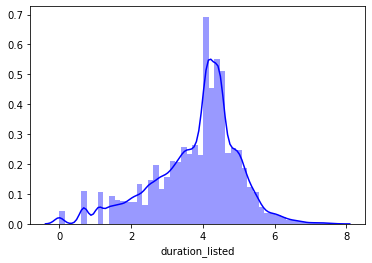

In [62]:
sns.distplot( df["duration_listed"] , color="b")

In [63]:
# Linear Regression after log transformation
# Performing Linear Regression
lin_reg = LinearRegression(normalize= True).fit(X_train, Y_train)

In [64]:
# Testing the Predictive Accuracy 
train_predlinreg = lin_reg.predict(X_train)
test_predlinreg = lin_reg.predict(X_validation)

In [65]:
# Final representation of Linear Regression Model Accuracy both on Testing and Training sets after the log transformation
print(X_train.shape, Y_train.shape, X_validation.shape, Y_validation.shape)
print("R squared for training set:", r2_score(Y_train, train_predlinreg))
print("R squared for Test Set:", r2_score(Y_validation, test_predlinreg))
print("MSE train:",np.sqrt(mean_squared_error(Y_train,train_predlinreg)))
print("MSE test:",np.sqrt(mean_squared_error(Y_validation,test_predlinreg)))
list(zip(df,lin_reg.coef_))

(26964, 16) (26964,) (11557, 16) (11557,)
R squared for training set: 0.1690187284152861
R squared for Test Set: 0.18126759476250864
MSE train: 1.0839454601214498
MSE test: 1.0736843478830824


[('transmission', -0.0232183817693986),
 ('color', 0.003783514893310648),
 ('odometer_value', 5.024553995828406e-07),
 ('year_produced', 0.002050928032762494),
 ('engine_fuel', -0.021927090752018274),
 ('engine_has_gas', 0.0733365311519157),
 ('engine_type', -0.021943637011473848),
 ('engine_capacity', 0.027414898100834827),
 ('body_type', -0.00648062179210888),
 ('has_warranty', -1.4037545208110955),
 ('state', -0.18537471899813737),
 ('drivetrain', -0.007561708186709278),
 ('price_usd', 1.578774715273051e-05),
 ('is_exchangeable', -0.06816435360782988),
 ('number_of_photos', -0.02360603935003924),
 ('up_counter', 0.009581369098249479)]